In [55]:
import numpy as np
from statistics import mean

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# y = mx + b (m is slope and b is y-intercept)
# m is going to be our best slope!
# m = mean(x).mean(y) - mean(xy) / mean(x^2) - mean(x^2)
# b = mean(y) - m* mean(x)
# regression is just a straight line

In [34]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,7,8,8], dtype=np.float64)

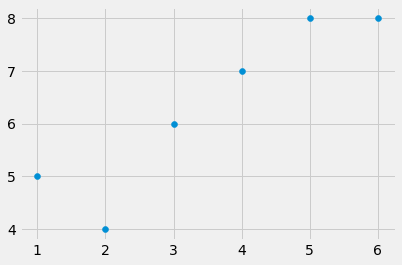

In [35]:
plt.scatter(xs,ys)
plt.show()

In [60]:
def best_fit_slope_intercept(xs,ys):
    '''
    xs and ys are the data points
    the equation for line is y = mx + b
    m = mean(xs) * mean(ys) - mean(xs*ys) / mean(xs**2) - mean(xs**2)
    b = mean(ys) - m * mean(xs)

    '''
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
          ((mean(xs)**2) - mean(xs**2))
        )

    b = mean(ys) - m * mean(xs)
    return m,b

m,b = best_fit_slope_intercept(xs,ys)

print(m,b)

regression_lines = [(m*x)+b for x in xs]

0.8000000000000009 3.5333333333333297


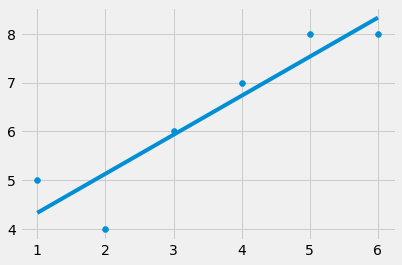

In [38]:
plt.scatter(xs,ys)
plt.plot(xs, regression_lines)
plt.show()

9.133333333333336


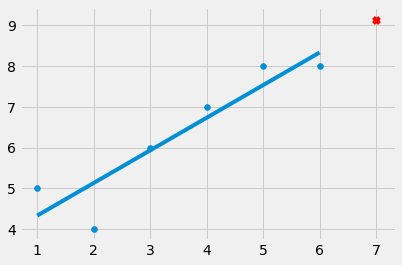

In [54]:
# now let's predict
predict_x = 7
predcit_y = m*predict_x + b
print(predcit_y)

plt.scatter(xs,ys)
plt.scatter(predict_x, predcit_y, color='r', marker='x')
plt.plot(xs, regression_lines)
plt.show()